## Notes

Just load the csv file gb1_10k_seq_vals_percentiles, it has both additive trait and vals

### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('GB1.csv')
#sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,seq,val
0,VDGV,0.000000
1,ADGV,-1.062518
2,CDGV,-1.576334
3,DDGV,-1.294319
4,EDGV,-2.779853


In [3]:
len(input_data_ordered_raw)

149361

In [4]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

## Gauge Fixed learned model

In [7]:
learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/learned_and_evaluated_models/GB1_learned_model_IM_full.csv')
#learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/sort_seq_IM_model.csv',sep='\t')
#learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/sort_seq_LS_model.csv',sep='\t')
#del learned_model_im['Unnamed: 0']
#learned_model_im = learned_model_im[[ 'val_A', 'val_C', 'val_G', 'val_T']]
learned_model_im = learned_model_im[['val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G','val_H', 'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q','val_R', 'val_S', 'val_T', 'val_V', 'val_W', 'val_Y']]
learned_model_im.head()

,val_A,val_C,val_D,val_E,val_F,val_G,val_H,val_I,val_K,val_L,val_M,val_N,val_P,val_Q,val_R,val_S,val_T,val_V,val_W,val_Y
0,3.072540e-14,6.372680e-14,-6.727950e-14,-3.227970e-14,7.371880e-14,-1.462720e-13,-1.326720e-14,6.972200e-14,-4.027330e-14,1.177110e-13,9.872660e-14,-1.092740e-13,-1.352810e-13,-1.126880e-14,-4.027330e-14,-5.226370e-14,6.172840e-14,8.071320e-14,7.716050e-15,4.371500e-14
1,8.820000e-15,5.810000e-14,5.290000e-15,-6.600000e-14,4.690000e-14,-4.190000e-14,6.930000e-14,1.270000e-14,-1.510000e-14,-6.480000e-14,-4.110000e-14,2.230000e-15,-1.270000e-13,-1.450000e-14,1.380000e-14,1.180000e-14,-3.930000e-14,1.400000e-14,8.200000e-14,8.510000e-14
2,7.338570e-14,1.194040e-13,-7.260860e-14,-6.161740e-14,1.393890e-13,2.223780e-13,-5.462300e-14,-6.861180e-14,-5.861980e-14,7.238650e-14,1.842970e-14,-5.462300e-14,-6.861180e-14,-3.458340e-14,-6.561420e-14,-2.359220e-14,-7.360780e-14,-3.758100e-14,2.386980e-15,2.642330e-14
3,1.280000e-13,1.560000e-13,-5.280000e-14,-1.110000e-13,7.020000e-14,6.210000e-14,-8.050000e-14,3.020000e-14,-1.330000e-13,7.300000e-14,1.290000e-13,-5.520000e-15,-1.160000e-13,-7.700000e-14,-1.650000e-13,4.380000e-14,6.730000e-14,4.820000e-14,-1.010000e-14,-5.750000e-14


In [8]:
learned_model_im.columns

Index(['val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G', 'val_H', 'val_I',
       'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q', 'val_R', 'val_S',
       'val_T', 'val_V', 'val_W', 'val_Y'],
      dtype='object')

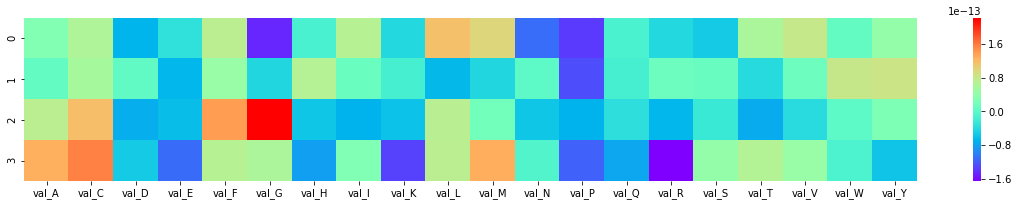

In [9]:
import seaborn as sns
plt.figure(figsize=[20,3])
sns.heatmap(learned_model_im,cmap='rainbow')
plt.show()

In [10]:
learn_model_copy = learned_model_im.copy()

## reweight model

Divided all weights by square root of the sum of the squares of all weights

In [23]:
rescale_weight = np.sum(np.sum(np.square(learn_model_copy)))**0.5
learn_model_copy = learn_model_copy.copy()/rescale_weight

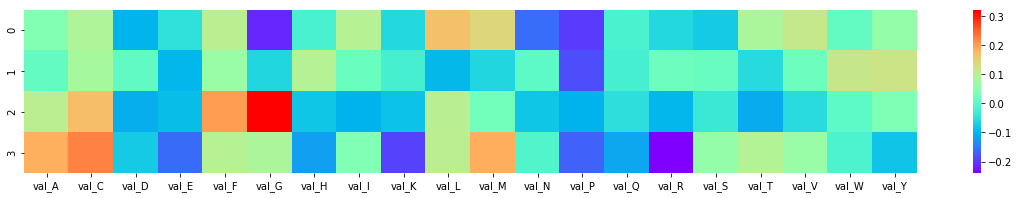

In [24]:
import seaborn as sns
plt.figure(figsize=[20,3])
sns.heatmap(learn_model_copy,cmap='rainbow')
plt.show()

In [27]:
# set termination signal to 0
learn_model_copy['val_*'] = [0,0,0,0]

In [30]:
type(learn_model_copy['val_*'])

pandas.core.series.Series

## output model 

In [31]:
learn_model_copy.to_csv('learn_model_gb1_gauge_fixed_rescaled.csv',sep='\t')

In [32]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

In [33]:
#len_of_data_to_use = 1000
sequences = input_data_ordered_raw['seq']
val = input_data_ordered_raw['val']

In [6]:
gb1_df_10k = pd.DataFrame({'seq':sequences,'val':val})
#gb1_df_10k.to_csv('gb1_10k.csv',sep='\t')

In [ ]:
from scipy.stats import percentileofscore

# generate example data
arr = gb1_df_10k['val']

# pre-sort array
arr_sorted =  sorted(arr)

# calculate percentiles using scipy func percentileofscore on each array element
s = pd.Series(arr)
percentiles = s.apply(lambda x: percentileofscore(arr_sorted, x))

In [ ]:
#plt.hist(arr,bins=50)

plt.hist(percentiles,bins=150)
plt.show()

In [ ]:
gb1_df_10k.head()

In [ ]:
len(gb1_df_10k)

In [ ]:
gb1_df_10k['percentiles'] = percentiles

In [ ]:
gb1_df_10k.head()

In [ ]:
#gb1_df_10k.to_csv('global_epistasis_gb1/gb1_10k_seq_vals_percentiles.csv',sep='\t')

## Load dataframe with percentiles

In [88]:
gb1_df_percentiles = pd.read_csv('global_epistasis_gb1/gb1_10k_seq_vals_percentiles.csv')
del gb1_df_percentiles['Unnamed: 0']
gb1_df_percentiles.head()

,seq,val,val_scaled,percentiles,seq_pro,additive_trait
0,VDGV,0.000000,0.975696,97.569647,VDGV,0.516837
1,ADGV,-1.062518,0.952933,95.293283,ADGV,0.444383
2,CDGV,-1.576334,0.940419,94.041952,CDGV,0.492216
3,DDGV,-1.294319,0.947369,94.736913,DDGV,0.302333
4,EDGV,-2.779853,0.909179,90.917977,EDGV,0.353062


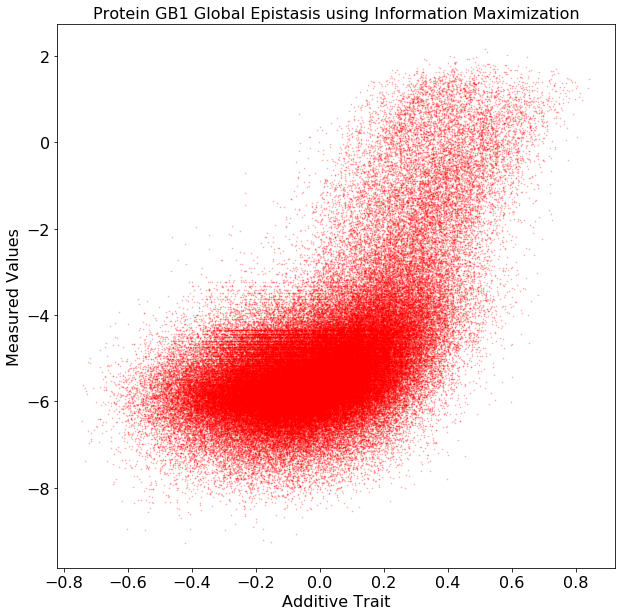

In [107]:
plt.figure(figsize=[10,10])
plt.scatter(gb1_df_percentiles['additive_trait'],gb1_df_percentiles['val'],s=0.5,color='red',alpha=0.25)
plt.xlabel('Additive Trait',fontsize=16)
plt.ylabel('Measured Values',fontsize=16)
plt.title('Protein GB1 Global Epistasis using Information Maximization',fontsize=16)
plt.tick_params(labelsize=16)
plt.savefig('GB1_global_epistasis_MI_max_full_data.png')
plt.show()

In [155]:
gb1_df_percentiles.loc[5782]

seq               EVGE
val           -4.73382
val_scaled         0.7
percentiles    70.0002
Name: 5782, dtype: object

In [35]:
len(gb1_df_percentiles)

149361

In [78]:
val_scaled = gb1_df_percentiles['val_scaled']
#val_scaled = (val_scaled-min(val_scaled))/(max(val_scaled)-min(val_scaled))

In [37]:
bins_to_use = 20
#counts,bins = np.histogram(gb1_df_10k['val'],bins=bins_to_use)
counts,bins = np.histogram(val_scaled,bins=bins_to_use)

In [38]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [39]:
#temp_df = gb1_df_10k[].copy()
temp_df = gb1_df_percentiles.copy()

In [239]:
len(temp_df['val_scaled'][0:10000])

10000

In [40]:
len(temp_df)

149361

In [41]:
for bin_index in range(len(bins)):
    if(bin_index<len(bins)-1):
        print(bin_index,bins[bin_index],bins[bin_index+1])     

0 0.0 0.05
1 0.05 0.1
2 0.1 0.15000000000000002
3 0.15000000000000002 0.2
4 0.2 0.25
5 0.25 0.30000000000000004
6 0.30000000000000004 0.35000000000000003
7 0.35000000000000003 0.4
8 0.4 0.45
9 0.45 0.5
10 0.5 0.55
11 0.55 0.6000000000000001
12 0.6000000000000001 0.65
13 0.65 0.7000000000000001
14 0.7000000000000001 0.75
15 0.75 0.8
16 0.8 0.8500000000000001
17 0.8500000000000001 0.9
18 0.9 0.9500000000000001
19 0.9500000000000001 1.0


## Get sequences and bin numbers

In [42]:
sequence_bins_list = []
# loop over every sequence
for index, row in temp_df.iterrows():
    # for each row, put sequences in the correct bin based on comparing values to bins
    #print(index,row['seq'], row['val'])
    for bin_index in range(len(bins)):
        if(bin_index<len(bins)-1): # do go out of bounds
            if((row['val_scaled']>= bins[bin_index]) and (row['val_scaled']<=bins[bin_index+1])):
                #print('Seq: ',row['seq'],' going in bin: ',bin_index)
                sequence_bins_list.append([row['seq'],bin_index])
                
                

In [43]:
sequence_counts_array = np.array(sequence_bins_list)

## deal with some weird duplicated sequences

In [44]:
import collections
print( [item for item, count in collections.Counter(sequence_counts_array[:,0]).items() if count > 1])
sequences_with_extra_counts = [item for item, count in collections.Counter(sequence_counts_array[:,0]).items() if count > 1]

['EVGE', 'CMCR', 'CSEL', 'IEAP', 'IYVN', 'MWTR', 'WAPG', 'YNVI']


In [132]:
#gb1_df_percentiles.loc[gb1_df_percentiles['seq']=='YNVI']
'YNVI' in set(list(sequence_counts_array[:,0]))

True

In [45]:
#len(set(list(sequence_counts_array[:,0])))
duplicate_seq_indexes_list = []
for duplicate_index in range(len(sequences_with_extra_counts)):
    print(list(sequence_counts_array[:,0]).index(sequences_with_extra_counts[duplicate_index]))
    duplicate_seq_indexes_list.append(list(sequence_counts_array[:,0]).index(sequences_with_extra_counts[duplicate_index]))

5782
35547
37305
71385
77219
96665
136256
146539


In [143]:
len(pd.unique(sequence_counts_array[:,0]))

149361

In [46]:
sequence_counts_array = np.delete(sequence_counts_array, duplicate_seq_indexes_list, axis=0).copy()

In [47]:
len(sequence_counts_array)

149361

In [48]:
len(sequence_counts_array[:,1])

149361

In [49]:
sequence_counts_array[:,1]
seq_bin_df = pd.DataFrame({'seq':sequence_counts_array[:,0],'bin':sequence_counts_array[:,1]})
seq_bin_df.head()

,bin,seq
0,19,VDGV
1,19,ADGV
2,18,CDGV
3,18,DDGV
4,18,EDGV


In [50]:
len(seq_bin_df)

149361

#### Un-comment to train on subset of data

In [54]:
#seq_bin_df = seq_bin_df.sample(10000).copy()

In [55]:
print(min(sequence_counts_array[:,1].astype('int')))
print(max(sequence_counts_array[:,1].astype('int')))

0
19


In [56]:
count_cols = []
for bin_index in range(len(bins)-1):
    count_cols.append('ct_'+str(bin_index))

In [57]:
count_cols

['ct_0',
 'ct_1',
 'ct_2',
 'ct_3',
 'ct_4',
 'ct_5',
 'ct_6',
 'ct_7',
 'ct_8',
 'ct_9',
 'ct_10',
 'ct_11',
 'ct_12',
 'ct_13',
 'ct_14',
 'ct_15',
 'ct_16',
 'ct_17',
 'ct_18',
 'ct_19']

In [58]:
# append count columns to the dataframe
#c ount_cols are ['ct_0','ct_1','ct_2','ct_3','ct_4','ct_5','ct_6','ct_7','ct_8','ct_9'] for bins = 10
d = dict.fromkeys(count_cols, 0)
seq_counts_df = seq_bin_df.assign(**d).copy()

In [59]:
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,19,VDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,ADGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,CDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,DDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,EDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
seq_counts_df = seq_counts_df.copy()
seq_counts_df.reset_index(inplace=True)
del seq_counts_df['index']
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,19,VDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,ADGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,CDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,DDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,EDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
len(seq_counts_df)

149361

## populate counts columns

In [63]:
number_cols_to_displace = 2

for row_index in range(len(seq_counts_df['bin'])):
    count_col = seq_counts_df.columns[int(seq_counts_df['bin'][row_index])+number_cols_to_displace]
    seq_counts_df.loc[row_index,count_col] = 1

    

In [64]:
seq_counts_df.head(10)

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,19,VDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,19,ADGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18,CDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,18,DDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18,EDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,19,FDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,18,GDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,17,HDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,19,IDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,17,KDGV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
len(seq_counts_df)

149361

In [67]:
seq_counts_df.to_csv('global_epistasis_gb1/GB1_mpathic_format_full.csv',sep='\t')

In [72]:
#temp_df['val_scaled'][0:10000]
additive_trait_df = pd.read_csv('evaluated_model_full.csv',sep='\t')
del additive_trait_df['Unnamed: 0']
additive_trait_df.head()

,ct,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,seq_pro,val
0,1,0,0,0,0,0,0,0,0,1,0,VDGV,0.045543
1,1,0,0,0,0,0,0,0,1,0,0,ADGV,0.045543
2,1,0,0,0,0,0,0,1,0,0,0,CDGV,0.045543
3,1,0,0,0,0,0,0,1,0,0,0,DDGV,0.045543
4,1,0,0,0,0,0,1,0,0,0,0,EDGV,0.045543


In [84]:
len(additive_trait_df['val'])

149359

In [80]:
additive_trait = additive_trait_df['val']
additive_trait_scaled = (additive_trait-min(additive_trait))/(max(additive_trait)-min(additive_trait))

In [81]:
len(additive_trait_scaled)

149359

In [83]:
len(val_scaled)

149361

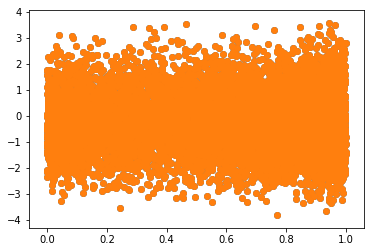

In [247]:
plt.scatter(temp_df['val_scaled'][0:10000],additive_trait_df['val'])
plt.show()